## Классификация MNIST

##### Автор: [Радослав Нейчев](https://www.linkedin.com/in/radoslav-neychev/), https://t.me/s/girafe_ai

In [21]:
import numpy as np

import torch
from torch import nn
from torch.nn import functional as F

import torchvision
from torchvision.datasets import MNIST

from matplotlib import pyplot as plt
from IPython.display import clear_output

import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

Давайте обратимся к классической задаче распознавания рукописных цифр. Мы будем работать с набором данных [MNIST](http://yann.lecun.com/exdb/mnist/). В этом задании мы воспользуемся всем датасетом целиком.

__Ваша основная задача: реализовать весь пайплайн обучения модели и добиться качества $\geq 92\%$ на тестовой выборке.__

Код для обучения модели в данном задании отсутствует. Присутствует лишь несколько тестов, которые помогут вам отладить свое решение. За примером можно обратиться к ноутбуку с первого занятия.

Мы настоятельно рекомендуем писать код «с нуля», лишь изредка подглядывая в готовые примеры, а не просто «копировать-вставлять». Это поможет вам в будущем.

Text(0.5, 1.0, 'Image label: 6')

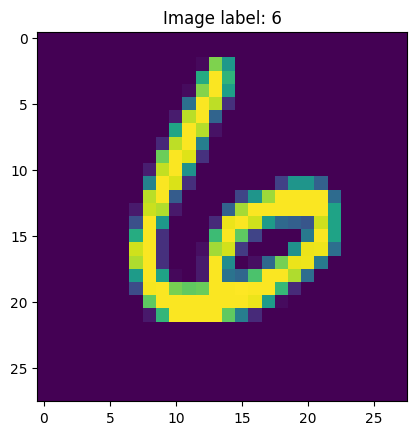

In [22]:
# do not change the code in the block below
# __________start of block__________

train_mnist_data = MNIST('.', train=True, transform=torchvision.transforms.ToTensor(), download=True)
test_mnist_data = MNIST('.', train=False, transform=torchvision.transforms.ToTensor(), download=True)


train_data_loader = torch.utils.data.DataLoader(
    train_mnist_data,
    batch_size=32,
    shuffle=True,
    num_workers=2
)

test_data_loader = torch.utils.data.DataLoader(
    test_mnist_data,
    batch_size=32,
    shuffle=False,
    num_workers=2
)

random_batch = next(iter(train_data_loader))
_image, _label = random_batch[0][0], random_batch[1][0]
plt.figure()
plt.imshow(_image.reshape(28, 28))
plt.title(f'Image label: {_label}')
# __________end of block__________

Постройте модель, представленную ниже. Пожалуйста, не создавайте чрезмерно сложную сеть — она не должна быть глубже четырёх слоёв (можно и меньше). Ваша основная задача — обучить модель и добиться как минимум 92% точности на тестовой выборке (hold-out выборке).

*Примечание: линейных слоёв и функций активации должно быть достаточно.*

__Обратите внимание, ваша модель должна быть представлена переменной `model`__

In [ ]:
class Discriminator(nn.Module):

    def __init__(self, input_size, hidden_dim, output_size):
        super(Discriminator, self).__init__()
        
        # define hidden linear layers
        self.fc1 = nn.Linear(input_size, hidden_dim*4)
        self.fc2 = nn.Linear(hidden_dim*4, hidden_dim*2)
        self.fc3 = nn.Linear(hidden_dim*2, 10)

        
        
    def forward(self, x):
        
        x = x.view(-1, 28*28)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        
        
        logits = self.fc3(x)
        return logits

In [32]:
# Discriminator hyperparams

# Size of input image to discriminator (28*28)
input_size = 784
# Size of discriminator output (real or fake)
d_output_size = 10
# Size of last hidden layer in the discriminator
d_hidden_size = 32

model = Discriminator(input_size,d_hidden_size,d_output_size)
print(model)

Discriminator(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


In [25]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

Ниже доступны локальные тесты для проверки вашей модели:

In [26]:
# do not change the code in the block below
# __________start of block__________
assert model is not None, 'Please, use `model` variable to store your model'

try:
    x = random_batch[0].reshape(-1, 784)
    y = random_batch[1]

    # compute outputs given inputs, both are variables
    y_predicted = model(x)    
except Exception as e:
    print('Something is wrong with the model')
    raise e
    
    
assert y_predicted.shape[-1] == 10, 'Model should predict 10 logits/probas'

print('Everything seems fine!')
# __________end of block__________

Everything seems fine!


Обучите модель на обучающей выборке. Рекомендуем поэкспериментировать с различными оптимизаторами.


In [ ]:
num_epochs = 14  # Можно экспериментировать с количеством эпох

for epoch in range(num_epochs):
    model.train()  # Переводим модель в режим обучения
    running_loss = 0.0
    for images, labels in train_data_loader:
        # Обнуление градиентов
        optimizer.zero_grad()
        
        # Прямой проход
        outputs = model(images)
        
        # Расчет функции потерь
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()  # Шаг оптимизации
        
        running_loss += loss.item()

    # Выводим промежуточный результат
    avg_loss = running_loss / len(train_data_loader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')

Epoch [1/15], Loss: 0.2933
Epoch [2/15], Loss: 0.1203
Epoch [3/15], Loss: 0.0825
Epoch [4/15], Loss: 0.0617
Epoch [5/15], Loss: 0.0491
Epoch [6/15], Loss: 0.0393
Epoch [7/15], Loss: 0.0315
Epoch [8/15], Loss: 0.0270
Epoch [9/15], Loss: 0.0226
Epoch [10/15], Loss: 0.0199
Epoch [11/15], Loss: 0.0169
Epoch [12/15], Loss: 0.0178
Epoch [13/15], Loss: 0.0144
Epoch [14/15], Loss: 0.0129
Epoch [15/15], Loss: 0.0139


Также помните, что вы всегда можете обратиться к отличной [документации](https://pytorch.org/docs/stable/index.html) и [учебным материалам](https://pytorch.org/tutorials/).

Оценим качество классификации:

In [ ]:
# Оценка на обучающем наборе
predicted_labels = []
real_labels = []
model.eval()  # Переводим модель в режим оценки (без градиентов)
with torch.no_grad():
    for batch in train_data_loader:
        images, labels = batch
        outputs = model(images.reshape(-1, 784))
        predicted_labels.append(outputs.argmax(dim=1))
        real_labels.append(labels)

predicted_labels = torch.cat(predicted_labels)
real_labels = torch.cat(real_labels)
train_acc = (predicted_labels == real_labels).float().mean()

# Оценка на тестовой выборке
predicted_labels = []
real_labels = []
with torch.no_grad():
    for batch in test_data_loader:
        images, labels = batch
        outputs = model(images.reshape(-1, 784))
        predicted_labels.append(outputs.argmax(dim=1))
        real_labels.append(labels)

predicted_labels = torch.cat(predicted_labels)
real_labels = torch.cat(real_labels)
test_acc = (predicted_labels == real_labels).float().mean()

print(f'Neural network accuracy on train set: {train_acc:.5f}')
print(f'Neural network accuracy on test set: {test_acc:.5f}')

Neural network accuracy on train set: 0.99540
Neural network accuracy on test set: 0.97740


Проверка, что пороги пройдены:

In [29]:
assert test_acc >= 0.92, 'Test accuracy is below 0.92 threshold'
assert train_acc >= 0.91, 'Train accuracy is below 0.91 while test accuracy is fine. We recommend to check your model and data flow'

Обращаем внимане, код ниже предполагает, что ваша модель имеет содержится в переменной `model`, а файл `hw_mnist_data_dict.npy` находится в той же директории, что и ноутбук (он доступен в репозитории).

In [30]:
# do not change the code in the block below
# __________start of block__________
import os
import json
assert os.path.exists('hw_mnist_data_dict.npy'), 'Please, download `hw_mnist_data_dict.npy` and place it in the working directory'

def get_predictions(model, eval_data, step=10):
    
    predicted_labels = []
    model.eval()
    with torch.no_grad():
        for idx in range(0, len(eval_data), step):
            y_predicted = model(eval_data[idx:idx+step].reshape(-1, 784))
            predicted_labels.append(y_predicted.argmax(dim=1))
    
    predicted_labels = torch.cat(predicted_labels).numpy()
    predicted_labels = ','.join([str(x) for x in list(predicted_labels)])
    return predicted_labels

loaded_data_dict = np.load('hw_mnist_data_dict.npy', allow_pickle=True)

submission_dict = {
    'train': get_predictions(model, torch.FloatTensor(loaded_data_dict.item()['train'])),
    'test': get_predictions(model, torch.FloatTensor(loaded_data_dict.item()['test']))
}

with open('submission_dict_mnist_task_1.json', 'w') as iofile:
    json.dump(submission_dict, iofile)
print('File saved to `submission_dict_mnist_task_1.json`')
# __________end of block__________

File saved to `submission_dict_mnist_task_1.json`


### Сдача задания
Сдайте сгенерированный файл в соответствующую задачу в соревновании, а именно:
    
* `submission_dict_mnist_task_1.json` в задачу Warmup (hw_mnist)

На этом задание завершено. Поздравляем!